# Implementation of K-Means Algorithm from scratch :

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## Define K-means class :

In [7]:
class K_means() :

    def __init__(self, n_clusters, max_iters=100) -> None:
        self.centroids = []
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Randomly initialize centroids
        self.centroids = X[np.random.choice(range(len(X)), self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            
            #np.linalg.norm(..., axis=2) calculates the Euclidean distance between each data point and each centroid.
            #The result is a matrix where each row corresponds to a data point, 
            #and each column corresponds to the distance to a centroid.
            
            # Assignment step
            # np.argmin => get the index of the minimal value of Euclidean distance between each data point and each centroid.
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)
            
            # Update step (by calculating the mean of each centroid)
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])
            
            # Check for convergence
            if np.all(new_centroids == self.centroids):
                break
            
            self.centroids = new_centroids

        return labels, self.centroids

    def predict(self,  X):
        # Find the index of the nearest centroid for a new data point
        predected = []
        for x in X :
            predected.append(np.argmin(np.linalg.norm(x - self.centroids, axis=1)))
        return np.array(predected)

##  Create Dataset for testing and visualize it :

,0,1
0,-3.509505,-8.737385
1,-2.056486,-9.006861
2,1.271144,3.869850
3,-0.218753,-9.176044
4,5.248297,3.324478
...,...,...
995,6.557377,3.943129
996,5.190504,3.439612
997,-3.024186,-3.198386
998,-0.488504,2.413896


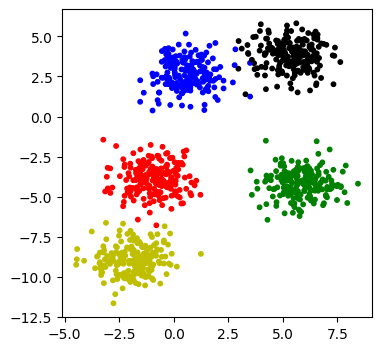

In [4]:
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=.9, random_state=40)

colors = ["y", "g", "r", "b","k"]
colors = [ colors[index] for index in y]

fig = plt.gcf()
fig.set_size_inches(4,4)
plt.scatter(X[:,0], X[:,1], color = colors,s = 10)

pd.DataFrame(X)

## Apply the implemented K_Means from scratch :

centroids values : [[-1.39608633 -6.43992111]
 [ 6.60300319 -4.05726316]
 [ 5.39407256  3.81326395]
 [ 0.58706835  2.54123254]
 [ 5.13785946 -4.28767229]]


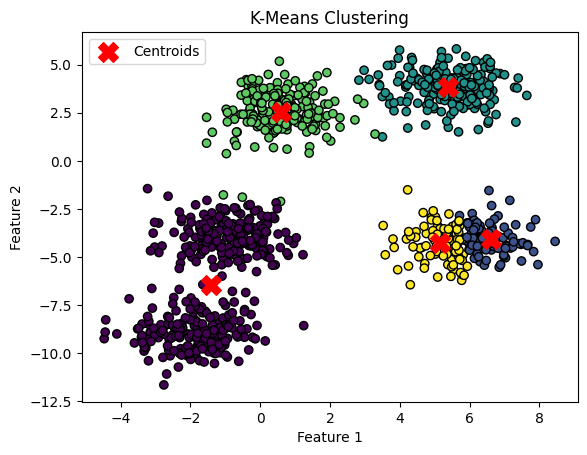

The new data points belongs to cluster : [3 0]


In [13]:
# Apply K-Means
k = 5
k_means_model = K_means(k)
labels, centroids = k_means_model.fit(X)

print(f"centroids values : {centroids}")

# Plot the data and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Example of using the predict function
new_data_point = np.array([[1.5, 1.5], [0, -2.5]])  # Replace this with your new data point
predicted_cluster = k_means_model.predict(new_data_point)
print(f"The new data points belongs to cluster : {predicted_cluster}")

## Apply K_Means from SKlearn :

centroids values : [[-0.9138511  -3.8691976 ]
 [ 5.39407256  3.81326395]
 [ 5.84112845 -4.1770759 ]
 [ 0.60084989  2.60856616]
 [-1.85289644 -8.89268936]]


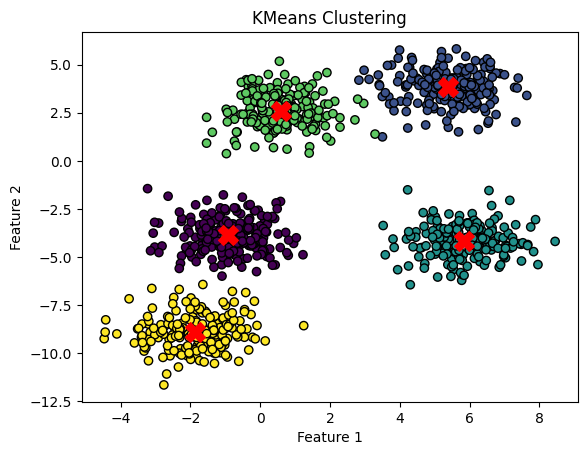

The new data points belongs to cluster : [3 0]


In [14]:
# Fit KMeans model
k_means_model2 = KMeans(n_clusters=k)
k_means_model2.fit(X)

# Predict cluster labels
labels = k_means_model2.predict(X)

# Get cluster centers
centers = k_means_model2.cluster_centers_

print(f"centroids values : {centers}")

# Plotting the clusters
# plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Example of using the predict function
new_data_point = np.array([[1.5, 1.5], [0, -2.5]])  # Replace this with your new data point
predicted_cluster = k_means_model2.predict(new_data_point)
print(f"The new data points belongs to cluster : {predicted_cluster}")
